In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
import glob

In [5]:
from pykrx import stock

In [6]:
list_code = ['005930', '000660', '207940', '051910', '005935', '035420', '068270',
       '005380', '006400', '035720', '051900', '000270', '012330', '028260',
       '005490', '105560', '017670', '036570', '055550', '034730', '096770',
       '066570', '015760', '018260', '032830', '326030', '003550', '033780',
       '009150', '251270', '086790', '090430', '000810', '011170', '009830',
       '010130', '018880', '086280', '010950', '316140', '019170', '024110',
#        '009540', '030200', '006800', '352820', '097950', '021240', '034220',
       '009540', '030200', '006800', '097950', '021240', '034220',
       '032640', '003670', '035250', '285130', '011200', '180640', '139480',
       '271560', '006280', '004020', '000100', '011780', '003490', '034020',
       '071050', '002790', '161390', '267250', '088980', '010140', '029780',
       '011070', '000120', '000720', '008930', '078930', '004990', '128940',
       '005830', '241560', '012510', '012750', '008770', '016360', '005387',
       '011790', '026960', '005940', '000210', '003410', '023530', '081660',
       '036460', '051915', '042660', '007070', '030000', '006360', '039490',
       '008560', '336260']

In [7]:
# list_code[99]

In [8]:
# df_kos = stock.get_market_ohlcv_by_ticker("20200831", "KOSPI")

In [8]:
import sys
sys.path.append('/project/work/time_series/')

In [9]:
from time_series.NBeats.NBeatsTrainer import NBeatsTrainer

In [11]:
df_stocks = pd.read_csv('stock_list.csv')
df_stocks.columns = ['code','name','open','high','low','close','volume','transaction','total','total_ratio','count']
df_stocks = df_stocks.sort_values('total', ascending=False).head(300)

In [12]:
df_ss = pd.read_csv('data/stocks/' + list_code[1] + '.csv')

In [13]:
df_ss['diff'] = ((df_ss['close'] - df_ss.shift()['close']) / df_ss.shift()['close']) * 100

In [14]:
df_ss = df_ss.set_index('날짜').astype(np.float)

In [15]:
# df_ss.sort_index(ascending=False).shift().rolling(5, min_periods=1)['close'].max()

In [16]:
df_ss['max_c'] = (df_ss.sort_index(ascending=False).shift().rolling(5, min_periods=1)['close'].max()).sort_index()
df_ss['max_h'] = (df_ss.sort_index(ascending=False).shift().rolling(5, min_periods=1)['high'].max()).sort_index()

In [17]:
df_ss['max_cp'] = ((df_ss['max_c'] - df_ss['close']) / df_ss['close']) * 100
df_ss['max_hp'] = ((df_ss['max_h'] - df_ss['close']) / df_ss['close']) * 100

In [18]:
df_ss[df_ss['max_cp']>0].describe()

,open,high,low,close,volume,diff,max_c,max_h,max_cp,max_hp
count,4358.000000,4358.000000,4358.000000,4358.000000,4.358000e+03,4358.000000,4358.000000,4358.000000,4358.000000,4358.000000
mean,89732.660165,92090.875631,87519.603488,89666.711106,2.834691e+07,0.088327,96347.042910,98420.044975,6.557498,8.605179
std,130135.813931,134162.354408,126433.734724,130078.254502,1.138636e+08,4.024992,141427.398671,145167.192379,7.839698,8.968595
min,2650.000000,2650.000000,2630.000000,2650.000000,0.000000e+00,-14.999945,3045.000000,3045.000000,0.101729,0.217155
25%,22600.000000,23050.000000,22200.000000,22600.000000,2.855263e+06,-1.920329,23750.000000,24150.000000,2.059457,3.463408
50%,33000.000000,33500.000000,32500.000000,32900.000000,5.151569e+06,0.000000,34600.000000,34850.000000,4.379291,6.043643
75%,78500.000000,79475.000000,77133.000000,78400.000000,1.003518e+07,1.805556,81800.000000,82400.000000,8.000094,10.118633
max,718996.000000,722547.000000,697693.000000,706569.000000,1.832794e+09,15.009171,718996.000000,770480.000000,98.524715,98.539924


In [ ]:
list_code = ['005930']

In [19]:
list_df_evaluate = []
for code in list_code:
    df_data_ = pd.read_csv('data/stocks/' + code + '.csv')
    df_data_['code'] = code
    df_data_['date'] = pd.to_datetime(df_data_['날짜'])
    df_data_ = df_data_.drop(['날짜'], axis=1)
    df_data_['max_c'] = (df_data_.sort_index(ascending=False).shift().rolling(5, min_periods=1)['close'].max()).sort_index()
    df_data_['max_h'] = (df_data_.sort_index(ascending=False).shift().rolling(5, min_periods=1)['high'].max()).sort_index()
    df_data_['next_o'] = df_data_.shift(-1)['open']
    df_data_['next_c_5'] = df_data_.shift(-5)['close']
    for idx in range(20,0, -1):
        df_data_['close_sh_' + str(idx)] = df_data_[['close']].shift(idx)
    df_data_ = df_data_.dropna()
#     df_data_ = df_data_[df_data_['date'] > '2020-09']
    list_df_evaluate.append(df_data_)

In [20]:
df_evaluate = pd.concat(list_df_evaluate)
list_column_name = []
for idx in range(20,0, -1):
    list_column_name.append('close_sh_' + str(idx))

In [21]:
list_eval_x = []
list_eval_scale = []
for x in df_evaluate[list_column_name].values:
    scaler = MinMaxScaler()
    data = scaler.fit_transform(np.reshape(x, [-1, 1]))
    list_eval_x.append(np.squeeze(data))
    list_eval_scale.append(scaler)

In [24]:
pred_best = trainer.predict(list_eval_x, 5, _name_backcast='4h', _name_epoch='150k', _name_loss='RMSE', _is_best=True)

In [25]:
list_pred = []
for idx, pred_ in enumerate(pred_best):
    pred_data = list_eval_scale[idx].inverse_transform(np.reshape(pred_, [-1, 1]))
    list_pred.append(np.squeeze(pred_data))

In [26]:
list_column_pred = []
for idx in range(1,6):
    list_column_pred.append('pred_' + str(idx))

In [27]:
df_pred = pd.DataFrame(list_pred, columns=list_column_pred, index=df_evaluate.index)

In [28]:
df_result = pd.concat([df_evaluate[['close', 'open', 'high', 'low','date', 'code', 'max_c', 'max_h', 'next_o', 'next_c_5']], df_pred], axis=1)

In [29]:
for column_pred in list_column_pred:
    df_result[column_pred] = ((df_result[column_pred] - df_result['close']) / df_result['close']) * 100
for column in ['max_c', 'max_h']:
    df_result[column] = ((df_result[column] - df_result['next_o']) / df_result['next_o']) * 100

In [30]:
df_result.head()

,close,open,high,low,date,code,max_c,max_h,next_o,next_c_5,pred_1,pred_2,pred_3,pred_4,pred_5
7944,54400,54600,55100,54100,2020-09-02,005930,5.575540,6.654676,55600.0,58400.0,0.204812,1.182976,2.000323,2.412497,2.507066
7945,56400,55600,56700,55500,2020-09-03,005930,7.246377,8.695652,55200.0,59200.0,-3.475891,-2.476625,-1.977615,-1.730794,-1.698339
7946,55600,55200,55800,55100,2020-09-04,005930,5.525847,6.951872,56100.0,59000.0,0.169339,1.128140,0.915243,1.170688,0.967092
7947,56500,56100,57300,55800,2020-09-07,005930,5.226481,5.923345,57400.0,60400.0,-2.018556,-1.027821,-0.691863,-0.309638,-0.739242
7948,58700,57400,58700,57200,2020-09-08,005930,4.810997,4.810997,58200.0,61000.0,-4.926101,-4.190062,-4.187340,-4.131229,-4.432190


In [31]:
df_s = df_result[df_result['code']=='005930']

In [32]:
df_s[df_s['pred_5']>-3]

,close,open,high,low,date,code,max_c,max_h,next_o,next_c_5,pred_1,pred_2,pred_3,pred_4,pred_5
7944,54400,54600,55100,54100,2020-09-02,005930,5.575540,6.654676,55600.0,58400.0,0.204812,1.182976,2.000323,2.412497,2.507066
7945,56400,55600,56700,55500,2020-09-03,005930,7.246377,8.695652,55200.0,59200.0,-3.475891,-2.476625,-1.977615,-1.730794,-1.698339
7946,55600,55200,55800,55100,2020-09-04,005930,5.525847,6.951872,56100.0,59000.0,0.169339,1.128140,0.915243,1.170688,0.967092
7947,56500,56100,57300,55800,2020-09-07,005930,5.226481,5.923345,57400.0,60400.0,-2.018556,-1.027821,-0.691863,-0.309638,-0.739242
7949,58400,58200,59300,57800,2020-09-09,005930,1.836394,2.337229,59900.0,61000.0,-1.372465,-1.546380,-1.908832,-2.190176,-2.513819
7951,59000,59300,59400,58200,2020-09-11,005930,1.328904,1.827243,60200.0,59300.0,-1.294326,-2.037374,-2.485885,-2.646120,-2.989844
7955,59500,60700,60800,59300,2020-09-17,005930,-0.836120,0.334448,59800.0,57800.0,0.811377,0.033489,-0.542581,-0.570096,-1.156191
7956,59300,59800,59900,59100,2020-09-18,005930,0.169205,1.522843,59100.0,57900.0,-0.769518,-0.843566,-1.219244,-1.499177,-2.128346
7957,59200,59100,60000,59000,2020-09-21,005930,-0.846024,1.015228,59100.0,58200.0,-0.979552,-1.266707,-1.291728,-1.103898,-1.423610
7958,58200,59100,59700,57800,2020-09-22,005930,0.342466,1.027397,58400.0,58200.0,1.044506,1.009631,0.976153,0.892531,0.510296


In [37]:
list_acc = []
for threshold in range(1,20):
    list_acc.append(len(df_result[(df_result['pred_5']>threshold) & (df_result['max_c'] > 1)]) / len(df_result[df_result['pred_5']>threshold]))

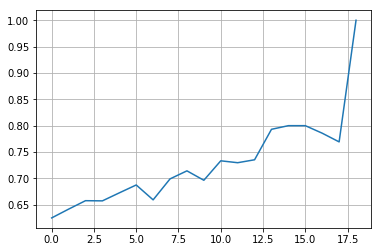

In [38]:
plt.grid()
plt.plot(list_acc)

In [327]:
df_result[df_result['pred_5'] >= 12].sort_values('date')

,close,open,high,low,date,code,max_c,max_h,next_o,next_c_5,pred_1,pred_2,pred_3,pred_4,pred_5
659,318000,321500,339000,302000,2020-09-09,285130,8.995502,11.244378,333500.0,348000.0,19.924224,21.653675,23.230238,24.666421,26.183284
4797,313500,336000,338500,295500,2020-09-17,051915,0.796178,3.184713,314000.0,290000.0,10.161852,11.534709,12.276675,11.885686,12.288766
4799,293500,312000,312500,290500,2020-09-21,051915,0.000000,5.000000,300000.0,300000.0,11.189842,12.848339,15.069527,15.833763,16.589278
669,304500,308500,314000,288000,2020-09-23,285130,1.517707,8.094435,296500.0,299000.0,4.501786,9.015538,11.627976,12.368842,12.903643
3758,250000,259500,264500,249000,2020-09-24,068270,2.376238,6.732673,252500.0,258000.0,8.172887,9.622713,11.620225,12.449188,12.751500
234,38610,40818,42535,38266,2020-09-24,336260,9.218891,16.036546,38855.0,36844.0,14.827279,18.635483,21.598436,23.208194,22.659427
4067,95000,98000,99200,94600,2020-09-24,039490,5.263158,6.842105,95000.0,100000.0,8.501118,10.336834,11.430789,11.865995,12.059268
5793,78100,83000,84200,77400,2020-09-24,011790,6.480305,7.496823,78700.0,83000.0,10.787572,11.872859,12.605104,12.928257,13.474502
8007,215000,221500,226500,214000,2020-09-24,006280,4.347826,6.407323,218500.0,228000.0,8.859077,10.535843,14.070436,15.902500,16.825153
670,275000,296500,298000,272500,2020-09-24,285130,11.524823,14.007092,282000.0,314500.0,16.360455,19.604932,21.385534,21.703898,22.110239


In [310]:
df_result[df_result['pred_5'] > 12].sum()

close                                               3980924
open                                                4157342
high                                                4238391
low                                                 3874907
code      0682703260302512702512702512702512700098300191...
max_c                                               189.724
max_h                                                271.01
next_o                                           4.0189e+06
pred_1                                              268.679
pred_2                                              335.141
pred_3                                               391.33
pred_4                                              426.854
pred_5                                              446.611
dtype: object

In [268]:
threshold = 5
df_group = (df_result[df_result['pred_5'] > threshold]).groupby('code').mean()
# len(df_result[(df_result['pred_5']>threshold) & (df_result['max_h'] > 5)]) / len(df_result[df_result['pred_5']>threshold])

In [273]:
df_group[df_group['max_c'] > 5].index.tolist()

In [277]:
df_f_result = df_result[df_result['code'].isin(df_group[df_group['max_c'] > 5].index.tolist())]

In [288]:
list_acc = []
for threshold in range(1,20):
    list_acc.append(len(df_f_result[(df_f_result['pred_5']>threshold) & (df_f_result['max_c'] > 3)]) / len(df_f_result[df_f_result['pred_5']>threshold]))

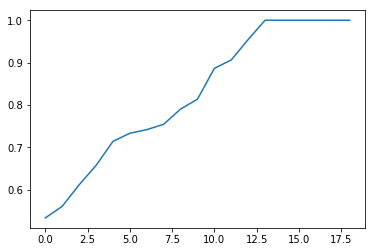

In [289]:
plt.plot(list_acc)

In [290]:
df_f_result[df_f_result['pred_5']>13].sort_values(by='date')

,close,open,high,low,date,code,max_c,max_h,next_o,pred_1,pred_2,pred_3,pred_4,pred_5
659,318000,321500,339000,302000,2020-09-09,285130,8.995502,11.244378,333500.0,19.924351,21.653793,23.230375,24.666509,26.183186
1793,29800,29100,30500,27900,2020-09-15,950130,10.135135,11.148649,29600.0,7.491073,12.951644,14.960937,15.577955,14.637479
1795,30800,32000,32900,30550,2020-09-17,950130,8.126036,11.940299,30150.0,4.739055,9.976512,15.135374,15.799805,19.095056
8007,215000,221500,226500,214000,2020-09-24,006280,4.347826,6.407323,218500.0,8.859099,10.535763,14.070291,15.902347,16.825007
784,41600,42750,43700,41250,2020-09-24,271980,4.311377,7.544910,41750.0,8.447801,10.745211,12.057429,13.013090,13.623648
190,93800,95000,102000,93800,2020-09-24,235980,22.573840,26.371308,94800.0,7.889700,10.931412,12.780217,13.659815,14.626749
234,38610,40818,42535,38266,2020-09-24,336260,9.218891,16.036546,38855.0,14.826966,18.634684,21.597374,23.207465,22.660196
670,275000,296500,298000,272500,2020-09-24,285130,11.524823,14.007092,282000.0,16.360500,19.604864,21.385477,21.704080,22.110875
1800,26450,28250,29250,26100,2020-09-24,950130,7.750473,15.122873,26450.0,12.049570,11.588478,13.693208,13.750908,14.647943
235,38120,38855,39346,36010,2020-09-25,336260,9.495059,16.329953,38757.0,6.183618,9.403026,13.681487,17.164095,19.101747


In [17]:
# for code in df_stocks.code.values:
#     day_start = '19000101'
#     if code == '005930':
#         print('code: ', code)
#         day_start = '19900302'
#     _df = stock.get_market_ohlcv_by_date(day_start, '20201028', code)
#     _df.columns = ['open','high','low','close','volume']
#     _df.to_csv('data/stocks/' + code + '.csv')

In [18]:
# df_stocks

In [11]:
list_file = glob.glob('data/stocks/*.csv')
# list_file = ['data/stocks/005930.csv']
# list_file = ['data/stocks/' + list_code[1] + '.csv']

In [12]:
len_forecast = 5
len_backcast = 20

In [15]:
list_columns = ['close', 'open', 'high', 'low']
list_train_x = []
list_train_y = []
list_evaluate_x = []
list_evaluate_y = []
list_evaluate_scaler = []
for file_path in list_file:
    df_data_ = pd.read_csv(file_path, index_col=0)
    df_data_ = df_data_.reset_index()
    df_data_['date'] = pd.to_datetime(df_data_['날짜'])
    df_data_ = df_data_.drop(['날짜'], axis=1)
    for column in list_columns:
        data_ = df_data_[column].values
        data_ = np.reshape(data_, [-1]).astype(np.float)
        len_split = int(len(data_) * 0.15)
        train = data_[:-len_split]
        evaluate = data_[-len_split:]

        for idx in range(len(train) -(1 + len_backcast + len_forecast)):
            scaler = MinMaxScaler()
            data_fore = scaler.fit_transform(np.reshape(train[idx: idx+len_backcast], [-1, 1]))
            data_back = scaler.transform(np.reshape(train[idx+len_backcast: idx+len_forecast+len_backcast], [-1, 1]))
            list_train_x.append(np.squeeze(data_fore))
            list_train_y.append(np.squeeze(data_back))
        if column == 'close':
            for idx in range(len(evaluate) -(1 + len_backcast + len_forecast)):
                scaler = MinMaxScaler()
                data_fore = scaler.fit_transform(np.reshape(train[idx: idx+len_backcast], [-1, 1]))
                data_back = scaler.transform(np.reshape(train[idx+len_backcast: idx+len_forecast+len_backcast], [-1, 1]))
                list_evaluate_x.append(np.squeeze(data_fore))
                list_evaluate_y.append(np.squeeze(data_back))
                list_evaluate_scaler.append(scaler)

In [16]:
len(list_train_x), np.shape(list_evaluate_x)

(4519884, (192896, 20))

In [31]:
(4519884 * 0.15) / (192896)

3.5147571748506965

In [17]:
trainer = NBeatsTrainer('deep_ohlc_10_1_1_20201119', 10,1,1)

Train - Step = 002207, loss(RMSE) = 50.052071


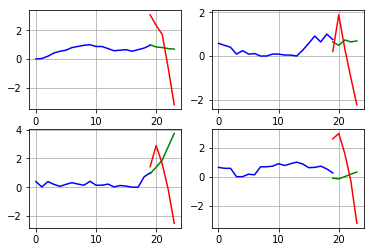

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.687500, RMSE = 276.687500
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 100000.000000 -> 276.687500
Train - Step = 004414, loss(RMSE) = 354.362549
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.687500 -> 276.681519
Train - Step = 006621, loss(RMSE) = 1.196748
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.681519 -> 276.680298
Train - Step = 008828, loss(RMSE) = 1.997146
Train - Step = 011035, loss(RMSE) = 0.501418
Train - Step = 013242, loss(RMSE) = 0.401433
Train - Step = 015449, loss(RMSE) = 0.380429
Train - Step = 017656, loss(RMSE) = 0.518449
Train - Step = 019863, loss(RMSE) = 0.456110
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.680298 -> 276.680237
Train - Step = 022070, loss(RMSE) = 9.006386
Train - Step = 024277, loss(RMSE) = 57.362251


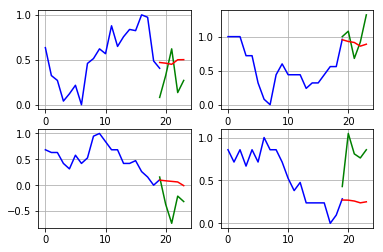

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.681488, RMSE = 276.681488
Train - Step = 026484, loss(RMSE) = 0.398704
Train - Step = 028691, loss(RMSE) = 0.640624
Train - Step = 030898, loss(RMSE) = 0.412536
Train - Step = 033105, loss(RMSE) = 0.468662
Train - Step = 035312, loss(RMSE) = 0.480828
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.680237 -> 276.679596
Train - Step = 037519, loss(RMSE) = 0.515706
Train - Step = 039726, loss(RMSE) = 95.747627
Train - Step = 041933, loss(RMSE) = 0.443006
Train - Step = 044140, loss(RMSE) = 0.418763
Train - Step = 046347, loss(RMSE) = 445.755646


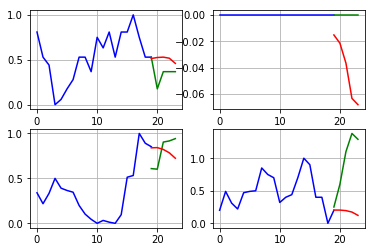

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.680878, RMSE = 276.680847
Train - Step = 048554, loss(RMSE) = 8.616035
Train - Step = 050761, loss(RMSE) = 0.408838
Train - Step = 052968, loss(RMSE) = 0.420033
Train - Step = 055175, loss(RMSE) = 0.399005
Train - Step = 057382, loss(RMSE) = 0.406157
Train - Step = 059589, loss(RMSE) = 0.465535
Train - Step = 061796, loss(RMSE) = 0.790169
Train - Step = 064003, loss(RMSE) = 0.542372
Train - Step = 066210, loss(RMSE) = 136.746368
Train - Step = 068417, loss(RMSE) = 0.397639


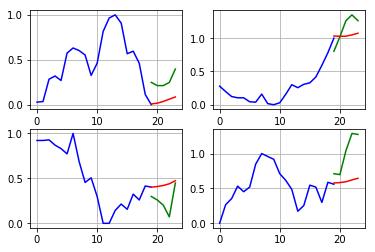

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.680847, RMSE = 276.680847
Train - Step = 070624, loss(RMSE) = 55.846703
Train - Step = 072831, loss(RMSE) = 2990.670410
Train - Step = 075038, loss(RMSE) = 7.447872
Train - Step = 077245, loss(RMSE) = 98.992065
Train - Step = 079452, loss(RMSE) = 12.885221
Train - Step = 081659, loss(RMSE) = 4.666914
Train - Step = 083866, loss(RMSE) = 0.398177
Train - Step = 086073, loss(RMSE) = 0.413416
Train - Step = 088280, loss(RMSE) = 32.018265
Train - Step = 090487, loss(RMSE) = 0.402323


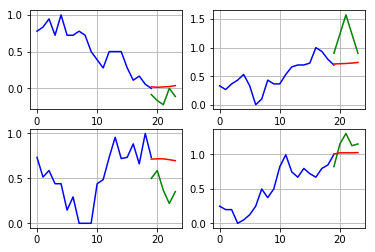

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.680511, RMSE = 276.680511
Train - Step = 092694, loss(RMSE) = 10.036482
Train - Step = 094901, loss(RMSE) = 0.515356
Train - Step = 097108, loss(RMSE) = 62.647102
Train - Step = 099315, loss(RMSE) = 170.592377
Train - Step = 101522, loss(RMSE) = 0.398194
Train - Step = 103729, loss(RMSE) = 90.849586
Train - Step = 105936, loss(RMSE) = 0.429365
Train - Step = 108143, loss(RMSE) = 3.422854
Train - Step = 110350, loss(RMSE) = 6.639331
Train - Step = 112557, loss(RMSE) = 3.371002


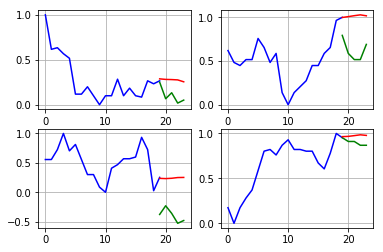

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.681122, RMSE = 276.681152
Train - Step = 114764, loss(RMSE) = 0.505083
Train - Step = 116971, loss(RMSE) = 51.872871
Train - Step = 119178, loss(RMSE) = 0.641355
Train - Step = 121385, loss(RMSE) = 0.472473
Train - Step = 123592, loss(RMSE) = 0.477888
Train - Step = 125799, loss(RMSE) = 158.035355
Train - Step = 128006, loss(RMSE) = 0.385724
Train - Step = 130213, loss(RMSE) = 75.791725
Train - Step = 132420, loss(RMSE) = 51.385872
Train - Step = 134627, loss(RMSE) = 344.318176


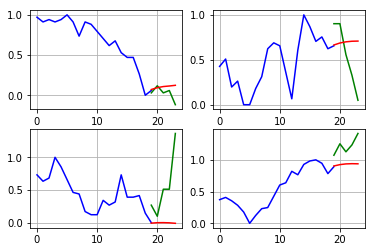

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.681519, RMSE = 276.681519
Train - Step = 136834, loss(RMSE) = 9.862939
Train - Step = 139041, loss(RMSE) = 16.111744
Train - Step = 141248, loss(RMSE) = 19.882761
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.679596 -> 276.679230
Train - Step = 143455, loss(RMSE) = 0.398931
Refesh Best Model - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.679230 -> 276.679108
Train - Step = 145662, loss(RMSE) = 0.402802
Train - Step = 147869, loss(RMSE) = 0.387334
Train - Step = 150076, loss(RMSE) = 0.408936


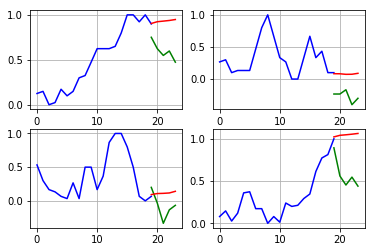

Evaluation - Name = deep_ohlc_10_1_1_20201119_150k_4h_RMSE_cuda.ckpt, loss = 276.681549, RMSE = 276.681549
------ END Train ------


In [18]:
trainer.train_direct(list_train_x, list_train_y, list_evaluate_x, list_evaluate_y, 5, _batch_size=2048, _name_backcast='4h', _name_loss='RMSE', _name_epoch='150k')

In [ ]:
# trainer.train_direct(list_train_x, list_train_y, list_evaluate_x, list_evaluate_y, 5, _batch_size=1024, _name_backcast='4h', _name_loss='RMSE', _name_epoch='150k')

In [94]:
pred_best = trainer.predict(list_evaluate_x, 5, _name_backcast='4h', _name_epoch='150k', _name_loss='RMSE', _is_best=True)
# pred_best = trainer.predict(list_evaluate_x, 5, _name_backcast='4h', _name_epoch='150k', _name_loss='RMSE')

In [95]:
list_real_y_1 = []
list_real_y_2 = []
list_real_y_3 = []
list_real_y_4 = []
list_real_y = []
list_pred = []
list_pred1 = []
for idx, p in enumerate(pred_best):
    list_pred.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(pred_best[idx], [-1, 1]))[4][0])
    list_pred1.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(pred_best[idx], [-1, 1]))[0][0])
    list_real_y.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(list_evaluate_y[idx], [-1, 1]))[4][0])
    list_real_y_1.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(list_evaluate_y[idx], [-1, 1]))[0][0])
    list_real_y_2.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(list_evaluate_y[idx], [-1, 1]))[1][0])
    list_real_y_3.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(list_evaluate_y[idx], [-1, 1]))[2][0])
    list_real_y_4.append(list_evaluate_scaler[idx].inverse_transform(np.reshape(list_evaluate_y[idx], [-1, 1]))[3][0])

In [96]:
df_pred = pd.DataFrame({'real_1':list_real_y_1, 'real_2':list_real_y_2, 'real_3':list_real_y_3, 'real_4':list_real_y_4, 'real_5':list_real_y, 'pred_1':list_pred1, 'pred_5':list_pred})

In [97]:
df_pred['real_diff2'] = df_pred['real_2'] - df_pred['real_1']
df_pred['real_diff3'] = df_pred['real_3'] - df_pred['real_1']
df_pred['real_diff4'] = df_pred['real_4'] - df_pred['real_1']
df_pred['real_diff5'] = df_pred['real_5'] - df_pred['real_1']
df_pred['pred_diff'] = df_pred['pred_5'] - df_pred['pred_1']
df_pred['diff_percent5'] = (df_pred['real_diff5'] / df_pred['real_1']) * 100
df_pred['pred_percent5'] = (df_pred['pred_diff'] / df_pred['real_1']) * 100

In [98]:
# df_pred[df_pred['pred_diff']>0].head()

In [102]:
list_acc = []
list_earn = []
for threshold in range(0,12):
    acc = len(df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_percent5'] > threshold)]) / len(df_pred[df_pred['pred_percent5'] > threshold])
    earn = df_pred[df_pred['pred_percent5'] > threshold]['diff_percent5'].mean()
    list_acc.append(acc)
    list_earn.append(earn)

<Figure size 1728x864 with 0 Axes>

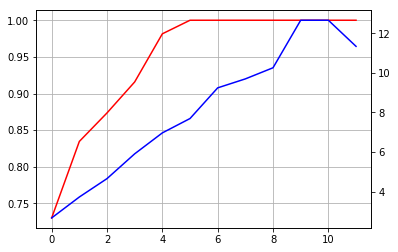

In [105]:
plt.figure(figsize=(24,12))
fig, ax1 = plt.subplots()
plt.grid()
ax1.plot(range(len(list_acc)), list_acc, color='r', label='real')
ax2 = ax1.twinx() 
ax2.plot(range(len(list_acc)), list_earn, color='b', label='real')
plt.show()

In [101]:
df_pred[df_pred['pred_percent5']>=7].describe()

,real_1,real_2,real_3,real_4,real_5,pred_1,pred_5,real_diff2,real_diff3,real_diff4,real_diff5,pred_diff,diff_percent5,pred_percent5
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,75690.909091,77090.909091,79500.000000,81263.636364,83018.181818,75057.970170,81706.682528,1400.000000,3809.090909,5572.727273,7327.272727,6648.712358,9.698000,8.778135
std,8057.103021,8193.101311,8437.179624,8612.116201,8906.381777,7757.009553,8569.079180,2869.494729,2936.479030,2780.320452,2066.441826,1293.944560,2.470125,1.441225
min,66800.000000,66600.000000,66800.000000,70500.000000,73400.000000,66275.093750,73232.976562,-5400.000000,-400.000000,2100.000000,5400.000000,4730.710938,6.484642,7.018859
25%,68600.000000,70150.000000,73750.000000,74050.000000,75300.000000,68777.519531,74382.195312,-50.000000,1100.000000,3200.000000,5800.000000,5676.800781,7.773638,7.843383
50%,74800.000000,74600.000000,77000.000000,80000.000000,80700.000000,71620.062500,78226.617188,2400.000000,4900.000000,5000.000000,6600.000000,6531.406250,9.540230,8.438509
75%,82000.000000,85050.000000,87900.000000,88850.000000,92900.000000,82700.636719,91110.234375,3400.000000,5600.000000,8050.000000,7950.000000,7807.929688,11.087072,9.586018
max,87900.000000,88600.000000,92800.000000,93000.000000,95300.000000,86546.562500,94336.453125,4500.000000,7800.000000,9700.000000,12200.000000,8583.375000,15.136476,11.680550


<Figure size 1728x864 with 0 Axes>

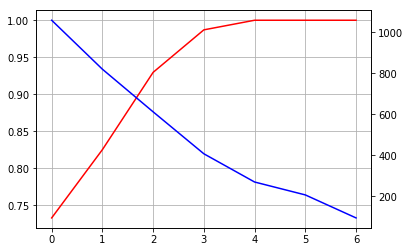

In [59]:
plt.figure(figsize=(24,12))
fig, ax1 = plt.subplots()
plt.grid()
ax1.plot(range(len(list_acc)), list_acc, color='r', label='real')
ax2 = ax1.twinx() 
ax2.plot(range(len(list_acc)), list_earn, color='b', label='real')
plt.show()

In [61]:
df_pred[df_pred['pred_percent5']>=4].describe()

,real_1,real_2,real_3,real_4,real_5,pred_1,pred_5,real_diff2,real_diff3,real_diff4,real_diff5,pred_diff,diff_percent5,pred_percent5
count,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,43827.727273,44583.636364,45517.50000,46171.818182,46520.681818,43708.900657,46063.326039,755.909091,1689.772727,2344.090909,2692.954545,2354.425382,6.126655,5.368366
std,9370.156203,9649.258579,9872.49082,10053.099088,10047.346844,9399.305816,9919.954395,918.556294,941.234935,1097.238220,1184.332958,628.478804,2.267058,0.812801
min,25600.000000,25840.000000,26660.00000,27300.000000,27540.000000,25926.251953,27288.140625,-2900.000000,180.000000,140.000000,240.000000,1196.632812,0.644815,4.027680
25%,36965.000000,37235.000000,38020.00000,38670.000000,38670.000000,36618.353516,38529.368164,240.000000,1055.000000,1672.500000,1880.000000,1819.896973,5.054645,4.804408
50%,45075.000000,45375.000000,46600.00000,46950.000000,47085.000000,43761.228516,46431.636719,670.000000,1450.000000,2090.000000,2660.000000,2492.853516,6.692651,5.246132
75%,51525.000000,53485.000000,54625.00000,54750.000000,55500.000000,52180.076172,54873.084961,1175.000000,2262.500000,3125.000000,3500.000000,2750.577148,7.740431,6.117292
max,56800.000000,58600.000000,59500.00000,60000.000000,60000.000000,56422.476562,59315.484375,3100.000000,4400.000000,4800.000000,4900.000000,3919.667969,9.248555,7.049763


<Figure size 1728x864 with 0 Axes>

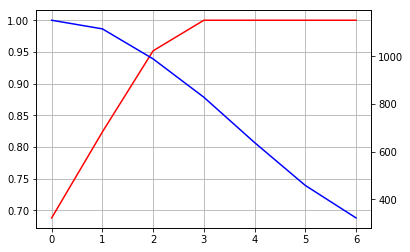

In [66]:
plt.figure(figsize=(24,12))
fig, ax1 = plt.subplots()
plt.grid()
ax1.plot(range(len(list_acc)), list_acc, color='r', label='real')
ax2 = ax1.twinx() 
ax2.plot(range(len(list_acc)), list_earn, color='b', label='real')
plt.show()

<Figure size 1728x864 with 0 Axes>

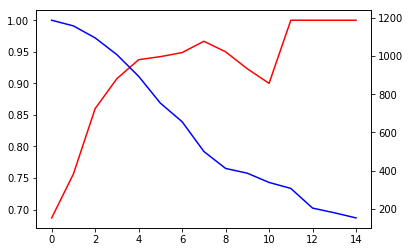

In [28]:
plt.figure(figsize=(24,12))
fig, ax1 = plt.subplots()
ax1.plot(range(len(list_acc)), list_acc, color='r', label='real')
ax2 = ax1.twinx() 
ax2.plot(range(len(list_acc)), list_earn, color='b', label='real')
plt.show()

<Figure size 1728x864 with 0 Axes>

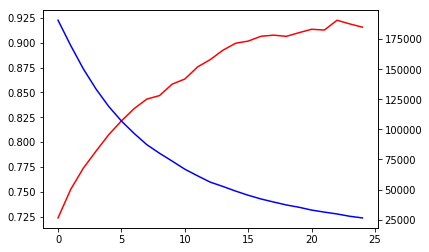

In [43]:
plt.figure(figsize=(24,12))
fig, ax1 = plt.subplots()
ax1.plot(range(len(list_acc)), list_acc, color='r', label='real')
ax2 = ax1.twinx() 
ax2.plot(range(len(list_acc)), list_earn, color='b', label='real')
plt.show()

In [46]:
# df_pred[(df_pred['pred_percent5'] > 10) & (df_pred['diff_percent5'] < 0)]

In [40]:
threshold = 10
len(df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_percent5'] > threshold)]) / len(df_pred[df_pred['pred_percent5'] > threshold]), len(df_pred[df_pred['diff_percent5'] > threshold])

(0.8214358348586537, 5960)

In [41]:
threshold = 15
len(df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_percent5'] > threshold)]) / len(df_pred[df_pred['pred_percent5'] > threshold]), len(df_pred[df_pred['diff_percent5'] > threshold])

(0.8635486981677917, 2642)

In [48]:
# df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_percent5'] > threshold)]

In [49]:
df_pred[df_pred['pred_percent5']>threshold]['diff_percent5'].sum()

31780.03199503733

In [50]:
len(df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_diff'] > 0)]) / len(df_pred[df_pred['pred_diff'] > 0])

0.6604912114175298

In [38]:
df_pred[df_pred['pred_diff']>0]['diff_percent5'].sum()

144141.05203219558

In [39]:
len(df_pred[(df_pred['real_diff5'] > 0) & (df_pred['pred_diff'] > 0)]) / len(df_pred[df_pred['pred_diff'] > 0])

0.5644861270453001

In [40]:
np.sqrt(np.mean((np.array(list_pred) - np.array(list_real_y))**2))

9012.56018055987

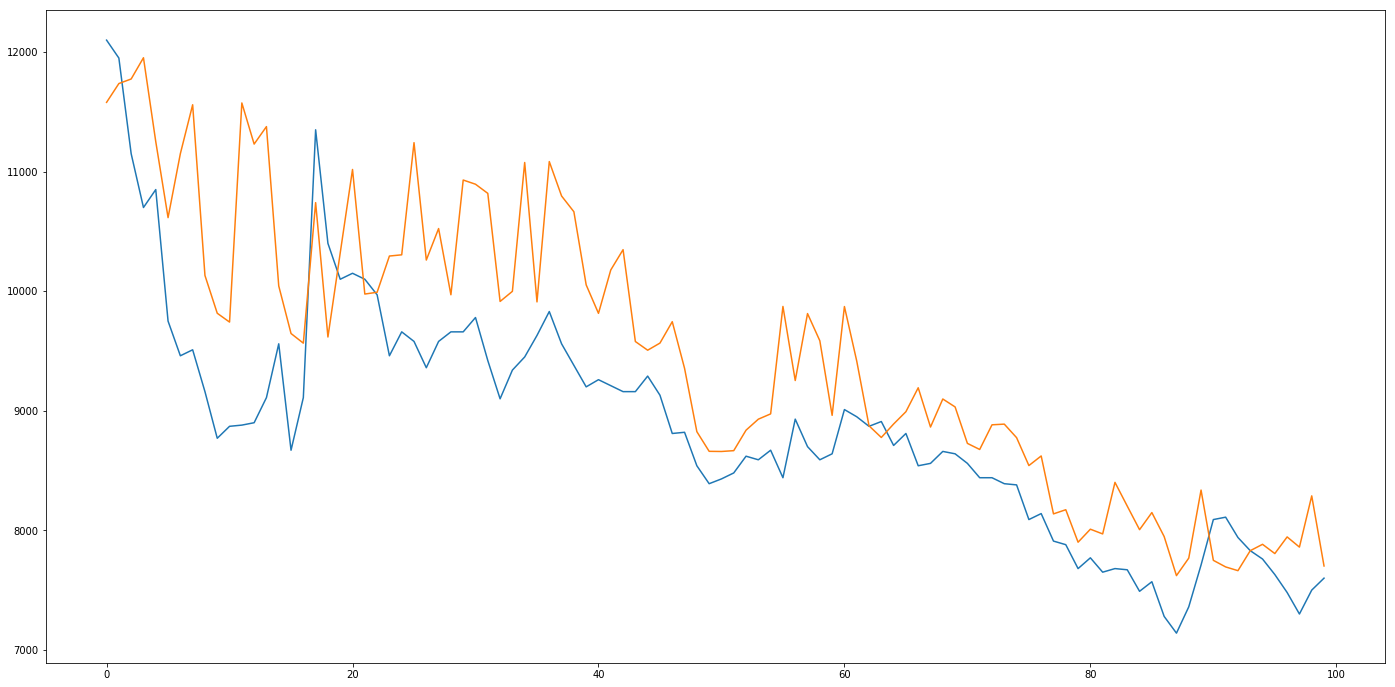

In [41]:
plt.figure(figsize=(24,12))
plt.plot(range(len(list_real_y[0:100])), list_real_y[0:100], label='real')
plt.plot(range(len(list_real_y[0:100])), list_pred[0:100], label='real')
plt.show()

In [ ]:
trainer.train_direct(list_train_x, list_train_y, list_evaluate_x, list_evaluate_y, 5, _batch_size=1024, _name_backcast='4h', _name_loss='RMSE', _name_epoch='150k')

In [ ]:
trainer.train_direct(list_train_x, list_train_y, list_evaluate_x, list_evaluate_y, 5, _batch_size=1024, _name_backcast='4h', _name_loss='RMSE', _name_epoch='150k')